# Solving the diffusion equation using a neural network. 

In this notebook we find the solution of the diffusion equation using a neural network. The diffusion equation in one dimension in its most general form is given by
$$\frac{du}{dt} = \frac{d^2u}{dx^2},$$ 
where 
$x \in [0,1]$ and $t \geq 0$. 
The initial condition is given by 
$$u(x,0) = \sin(\pi x)$$
and the boundary conditions are given by
$$u(0,t) = u(1,t) = 0.$$
We use the trial function 
$$g_t = (1-t)\sin(\pi x) + (1-x)*t*h_1(N)$$

The first step we will do is to find the best network and number of iterations in training by testing for different combinations. The code for solving the diffusion equation using the neural network are found in diffusion_solvers.py. 

In [14]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()

# import tensorflow as tf
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import time
from diffusion_solvers import nn_diffusion_solver

Nx = 10
x_np = np.linspace(0,1,Nx)

Nt = 10
t_np = np.linspace(0,1,Nt)

X,T = np.meshgrid(x_np, t_np)

x = X.ravel()
t = T.ravel()

x = tf.reshape(tf.convert_to_tensor(x),shape=(-1,1))
t = tf.reshape(tf.convert_to_tensor(t),shape=(-1,1))

points = tf.concat([x,t],1)

num_iter = 100000
num_hidden_neurons = [50]

lr = 0.01
reg_param=0

#Calculates the analytical solution and the neural network solution. 
analytic, nn, losses, iterations = nn_diffusion_solver(num_iter, lr, reg_param, num_hidden_neurons, points, x, t)

#Calculating the error of the neural network solution compared to the analytical solution. 
error = np.abs(analytic - nn)

print('Max error = ', np.max(error))
print("MSE = ", np.mean(error**2))

#Converts back to original grid. 
G_analytic = analytic.reshape((Nt,Nx))
G_dnn = nn.reshape((Nt,Nx))

Step: 0 / 100000 loss:  12.047333
Step: 1000 / 100000 loss:  5.1701946
Step: 2000 / 100000 loss:  4.874767
Step: 3000 / 100000 loss:  4.598979
Step: 4000 / 100000 loss:  4.2767
Step: 5000 / 100000 loss:  3.9159722
Step: 6000 / 100000 loss:  3.3329587
Step: 7000 / 100000 loss:  2.7413948
Step: 8000 / 100000 loss:  2.3973026
Step: 9000 / 100000 loss:  2.066939
Step: 10000 / 100000 loss:  1.7735552
Step: 11000 / 100000 loss:  1.5018115
Step: 12000 / 100000 loss:  1.2163482
Step: 13000 / 100000 loss:  1.0258979
Step: 14000 / 100000 loss:  0.9411888
Step: 15000 / 100000 loss:  0.8858719
Step: 16000 / 100000 loss:  0.8401291
Step: 17000 / 100000 loss:  0.80067366
Step: 18000 / 100000 loss:  0.76614714
Step: 19000 / 100000 loss:  0.73563516
Step: 20000 / 100000 loss:  0.7084456
Step: 21000 / 100000 loss:  0.68403757
Step: 22000 / 100000 loss:  0.66198397
Step: 23000 / 100000 loss:  0.64194304
Step: 24000 / 100000 loss:  0.6236385
Step: 25000 / 100000 loss:  0.6068433
Step: 26000 / 100000 loss

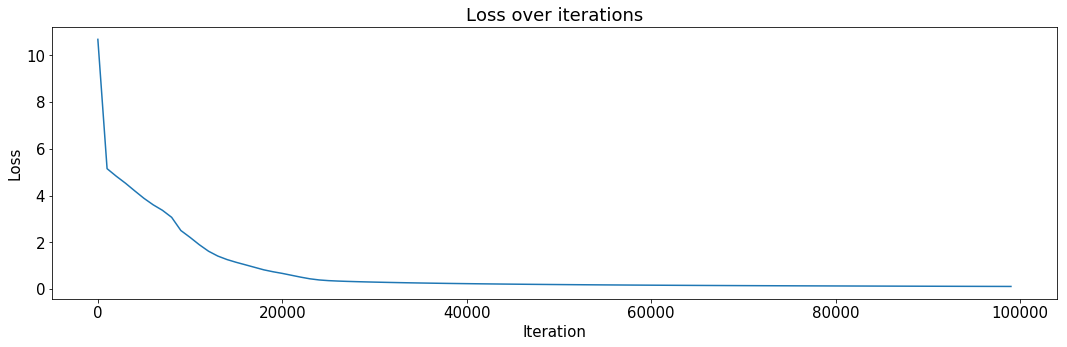

In [8]:
plt.figure(figsize=(18,5))
plt.plot(iterations, losses)
plt.title("Loss over iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
plt.close()

## We will now study the solution found with neural network compared to the analytical solution 

### Plotting the neural network solution, the analytical solution and the error. 

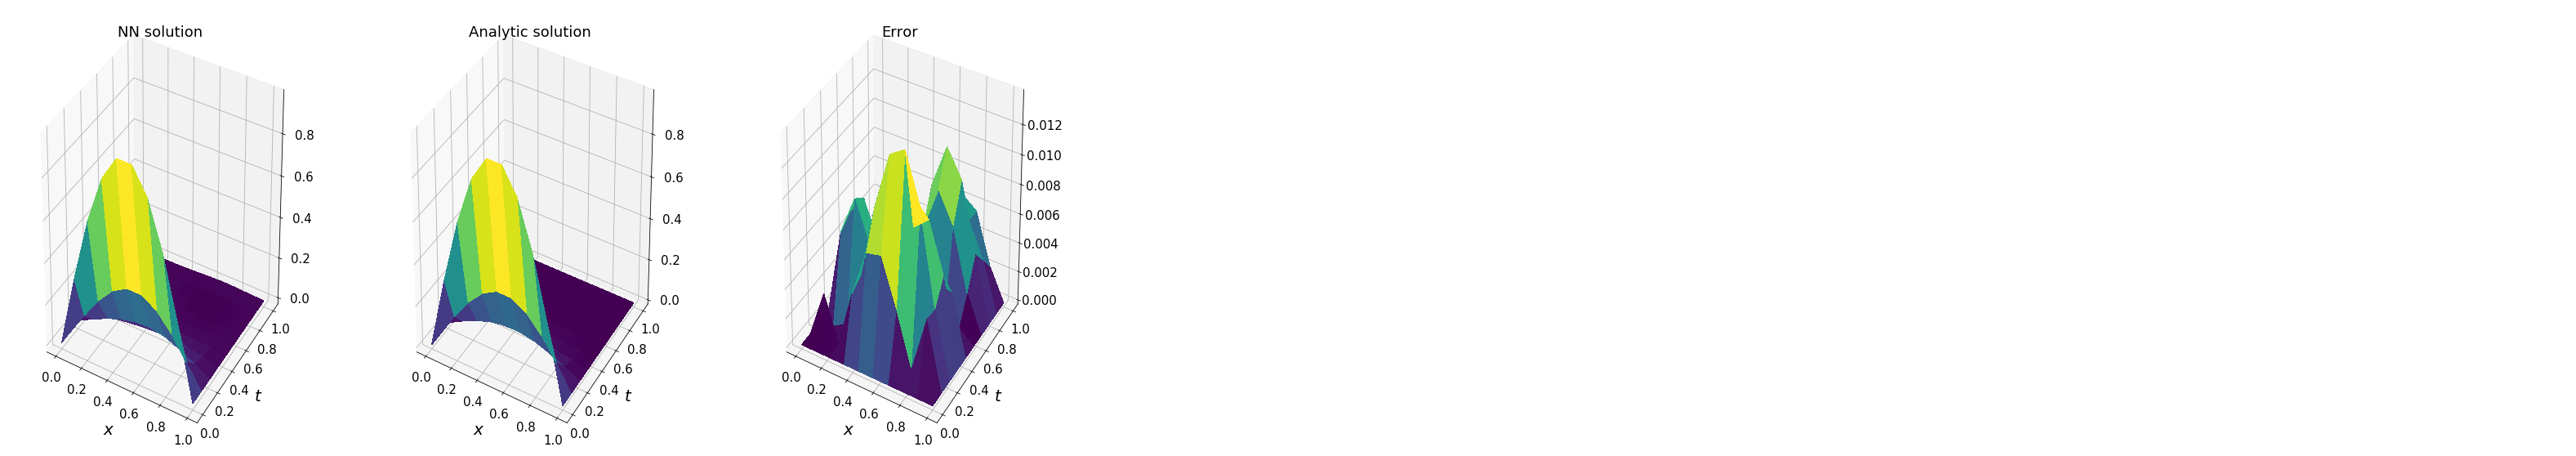

In [15]:
X,T = np.meshgrid(x_np, t_np)

diff = np.abs(G_analytic - G_dnn)
MSE = np.mean((G_analytic-G_dnn)**2)

plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(23,10))

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.plot_surface(X,T,G_dnn,linewidth=0,antialiased=False,cmap=cm.viridis)
ax1.tick_params(axis='z', pad=15)
ax1.set_xlabel('$x$', labelpad=10, fontsize=20)
ax1.set_ylabel('$t$', labelpad=10, fontsize=20)
ax1.set_title("NN solution")

ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.plot_surface(X,T,G_analytic,linewidth=0,antialiased=False,cmap=cm.viridis)
ax2.tick_params(axis='z', pad=15)
ax2.set_xlabel('$x$', labelpad=10, fontsize=20)
ax2.set_ylabel('$t$', labelpad=10, fontsize=20)
ax2.set_title("Analytic solution")

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.plot_surface(X,T,diff,linewidth=0,antialiased=False,cmap=cm.viridis)
ax3.tick_params(axis='z', pad=15)
ax3.set_xlabel('$x$', labelpad=10, fontsize=20)
ax3.set_ylabel('$t$', labelpad=10, fontsize=20)
ax3.set_title("Error")

plt.show()
plt.close()


### Plotting the neural network solution and the analytical solution for two different times. 

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/solution_and_error_nn_1D_dt_0_1_dx_0_1.png'

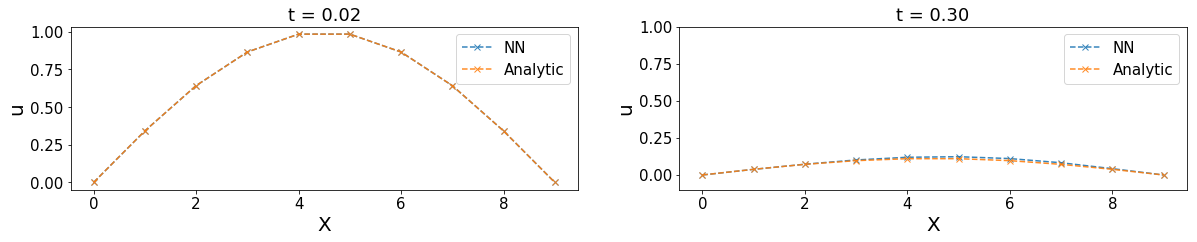

In [16]:
plt.rcParams.update({'font.size': 15})

dt = 1/Nt
dx = 1/Nx

time_1 = 0.02
time_2 = 0.3

plot_index_1 = int(time_1/dt)
plot_index_2 = int(time_2/dt)

plt.figure(figsize=(20,3))

plt.subplot(121)
plt.xlabel("X", fontsize=20)
plt.ylabel("u", fontsize=20)
plt.plot(G_dnn[plot_index_1,:], linestyle="--",marker="x", alpha= 0.9)
plt.plot(G_analytic[plot_index_1,:], linestyle="--",marker="x", alpha= 0.9)
plt.title(r"t = %.2f" %time_1)
plt.legend(["NN", "Analytic"])

plt.subplot(122)
plt.xlabel("X", fontsize=20)
plt.ylabel("u", fontsize=20)
plt.plot(G_dnn[plot_index_2,:], linestyle="--",marker="x", alpha= 0.9)
plt.plot(G_analytic[plot_index_2,:], linestyle="--",marker="x", alpha= 0.9)
plt.title(r"t = %.2f" %time_2)
plt.legend(["NN", "Analytic"])
plt.ylim((-0.1,1))


plt.subplots_adjust(hspace=0.5)

filename = ("solution_and_error_nn_1D_dt_%s_dx_%s.png"%(dt,dx)).replace(".","_",2)
plt.savefig(r"Plots/" + filename)

plt.show()
plt.close()

# Now we compare the results from neural network with the ones from using the forward Euler method for two different times.  

### Start by setting up the problems parameters and the networks parameters. Then finds the solution using the neural network. 

Step: 0 / 100000 loss:  8.992351
Step: 1000 / 100000 loss:  4.2977886
Step: 2000 / 100000 loss:  4.0503173
Step: 3000 / 100000 loss:  3.8825493
Step: 4000 / 100000 loss:  3.7033968
Step: 5000 / 100000 loss:  3.520716
Step: 6000 / 100000 loss:  3.3440795
Step: 7000 / 100000 loss:  3.1824102
Step: 8000 / 100000 loss:  3.0142386
Step: 9000 / 100000 loss:  2.486701
Step: 10000 / 100000 loss:  2.0045917
Step: 11000 / 100000 loss:  1.7686781
Step: 12000 / 100000 loss:  1.5226598
Step: 13000 / 100000 loss:  1.3287293
Step: 14000 / 100000 loss:  1.1933509
Step: 15000 / 100000 loss:  1.097529
Step: 16000 / 100000 loss:  1.0190156
Step: 17000 / 100000 loss:  0.9387847
Step: 18000 / 100000 loss:  0.84097075
Step: 19000 / 100000 loss:  0.7210867
Step: 20000 / 100000 loss:  0.63878757
Step: 21000 / 100000 loss:  0.6067976
Step: 22000 / 100000 loss:  0.58889675
Step: 23000 / 100000 loss:  0.5746608
Step: 24000 / 100000 loss:  0.56225145
Step: 25000 / 100000 loss:  0.5510836
Step: 26000 / 100000 loss

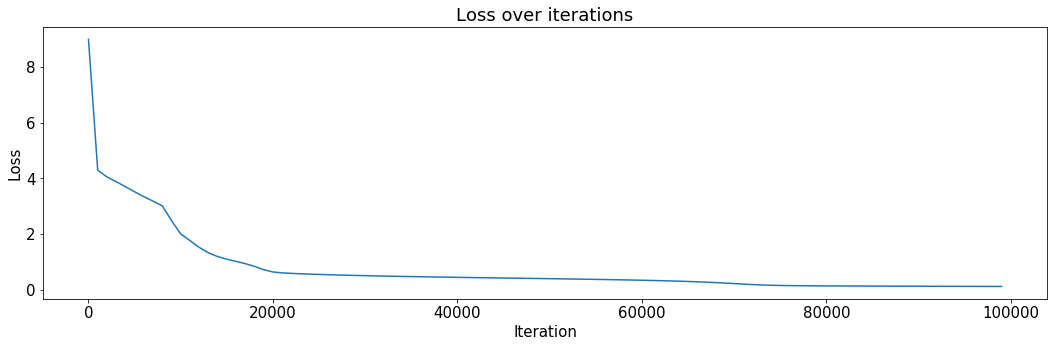

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.reset_default_graph()

# import tensorflow as tf
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import time

from diffusion_solvers import nn_diffusion_solver

dx = 0.1
dt = 0.005

Nx = int(1/dx)+1
x_np = np.linspace(0,1,Nx)

Nt = int(1/dt)+1
t_np = np.linspace(0,1,Nt)

X,T = np.meshgrid(x_np, t_np)

x = X.ravel()
t = T.ravel()

## The construction phase

zeros = tf.reshape(tf.convert_to_tensor(np.zeros(x.shape)),shape=(-1,1))
x = tf.reshape(tf.convert_to_tensor(x),shape=(-1,1))
t = tf.reshape(tf.convert_to_tensor(t),shape=(-1,1))

points = tf.concat([x,t],1)

num_iter = 100000
num_hidden_neurons = [50]

lr = 0.01
reg_param = 0

X = tf.convert_to_tensor(X)
T = tf.convert_to_tensor(T)

analytic, nn, losses, iterations = nn_diffusion_solver(num_iter, lr, reg_param, num_hidden_neurons, points, x, t)

#Calculating the error of the neural network solution compared to the analytical solution. 
error = np.abs(analytic - nn)

print('Max error = ', np.max(error))
print("MSE = ", np.mean(error**2))
# print("Training-time = %.2f seconds" %(time_end - time_start))

#Converts back to original grid. 
G_analytic = analytic.reshape((Nt,Nx))
G_dnn = nn.reshape((Nt,Nx))

plt.figure(figsize=(18,5))
plt.plot(iterations, losses)
plt.title("Loss over iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
plt.close()

### After finding the neural network solution, we compare it to the forward euler method for the same grid-size. 

In [ ]:
from diffusion_solvers import forward_euler, analytic_solution_1D
import numpy as np 
import matplotlib.pyplot as plt 

x_min = 0
x_max = 1

#Choose steplengths to test for different grid sizes. 
dx = 0.1    #Spatial step
dt = 0.005#0.5*(dx**2)#1e-3   #Time-step

t = 1  #Max time

num_x_values = (x_max - x_min)/dx
num_t_values = float(t)/dt

x_values = np.linspace(x_min, x_max, num_x_values +1)
t_values = np.linspace(0, t, num_t_values+1)

#Defining the boundary and intitial conditions.
g = (lambda x : np.sin(np.pi*x))
a = (lambda t : 0)
b = (lambda t : 0)

#Choose time to plot and calculate the index of this time.
plot_time = 0.3
plot_index = int(plot_time*t/dt)

params = {'figure.figsize': (20, 5), "legend.fontsize":15, "axes.labelsize": 15}
plt.rcParams.update(params)

plt.subplot(121)


#Plotting the solution from the different numerical methods.
u_forward_euler = forward_euler(x_min, x_max, dx, dt, t, g, a, b)
analytic_solution = analytic_solution_1D(x_values, t_values[plot_index])


plt.plot(x_values, u_forward_euler[plot_index,:], linestyle="--", marker = "x", alpha = 0.9)

plt.plot(x_values, analytic_solution, alpha = 0.8)

plt.plot(x_values, G_dnn[plot_index,:])

plt.legend(["Forward Euler","Analytic", "Nerual network"])
plt.title("Solution for dx = %.4f, dt = %.5f, t = %.3f" %(dx,dt, plot_time), fontsize=20)
plt.xlabel("X", fontsize=20)
plt.ylabel("u", fontsize=20)
plt.ylim(-0.1,1.1)

plt.subplot(122)

#Plotting the error for the different numerical methods compared to the analytical solution.
error_forward_euler = analytic_solution - u_forward_euler[plot_index,:]
error_neural_network = analytic_solution - G_dnn[plot_index,:]

plt.plot(x_values, abs(error_forward_euler), linestyle="--",marker="x", alpha= 0.9)
plt.plot(x_values, abs(error_neural_network), linestyle="--",marker="x", alpha= 0.9)


# plt.scatter(x_values, (error_forward_euler), alpha = 0.5, s = 20)
# plt.scatter(x_values, (error_backward_euler), alpha = 0.5, s=20)
# plt.scatter(x_values, (error_cn), alpha = 0.5,s=20)

plt.xlabel("X", fontsize=20)
plt.ylabel("u", fontsize=20)
plt.title("Error for dx = %.4f, dt = %.5f, t = %.3f" %(dx,dt, plot_time), fontsize=20)
plt.legend(["Forward Euler", "Neural network"])
plt.subplots_adjust( wspace=0.2)

filename = ("nn_solution_and_error_1D_dt_%s_dx_%s_t_%.3f.png"%(dt,dx, plot_time)).replace(".","_",3)
plt.savefig(r"Plots/" + filename)

plt.show()

print("MSE forward Euler = ", np.mean(sum(error_forward_euler**2)))
print("MSE nn = ", np.mean(sum(error_neural_network**2)) )
